In [1]:
import warnings as En_Offen_span__w
En_Offen_span__w.filterwarnings("ignore")
import pandas as En_Offen_span__N

In [2]:
####### English offensive language
En_Offen_span_1 = En_Offen_span__N.read_csv('English_final.csv')
En_Offen_span_1

,tweet,hate/offensive
0,rt mayasolov woman complain clean hous amp man...,0
1,rt mleew boy dat cold tyga dwn bad cuffin dat ...,1
2,rt urkindofbrand dawg rt sbabi life ever fuck ...,1
3,rt c g anderson viva base look like tranni,1
4,rt shenikarobert shit hear might true might fa...,1
...,...,...
24778,muthaf lie lifeask pearl corey emanuel right t...,1
24779,gone broke wrong heart babi drove redneck crazi,0
24780,young buck wanna eat dat nigguh like aint fuck...,1
24781,youu got wild bitch tellin lie,1


In [3]:
En_Offen_span_1['hate/offensive'].value_counts()

1    20620
0     4163
Name: hate/offensive, dtype: int64

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer as En_Offen_span_1tf

En_Offen_span_1zer = En_Offen_span_1tf(analyzer='word', ngram_range= (1,1))
En_Offen_span_1x = En_Offen_span_1zer.fit_transform(En_Offen_span_1['tweet'].values.astype('U')).toarray()

In [5]:
En_Offen_span_1x.shape

(24783, 30396)

In [6]:
En_Offen_span_1y = En_Offen_span_1['hate/offensive']

In [7]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler as En_Offen_span_1run
from collections import Counter as En_Offen_span_1cn
print('Original En_Offen_span_1 datashape %s' % En_Offen_span_1cn(En_Offen_span_1y))
En_Offen_span_1ml = En_Offen_span_1run()
En_Offen_span_1x, En_Offen_span_1y = En_Offen_span_1ml.fit_resample(En_Offen_span_1x, En_Offen_span_1y)
print('Resampled En_Offen_span_1 datashape %s' % En_Offen_span_1cn(En_Offen_span_1y))

Original En_Offen_span_1 datashape Counter({1: 20620, 0: 4163})
Resampled En_Offen_span_1 datashape Counter({0: 4163, 1: 4163})


In [8]:
from sklearn.decomposition import PCA as En_Offen_span_1pc
En_Offen_span_1pcQ = En_Offen_span_1pc(n_components = 10)

En_Offen_span_1x = En_Offen_span_1pcQ.fit_transform(En_Offen_span_1x)
En_Offen_span_1x.shape

(8326, 10)

In [9]:
from sklearn.preprocessing import OneHotEncoder as En_Offen_span_Oh

En_Offen_span_OhA = En_Offen_span_Oh()

En_Offen_span_1x = En_Offen_span__N.DataFrame(En_Offen_span_OhA.fit_transform(En_Offen_span_1x).toarray())
En_Offen_span_1x.shape

(8326, 82932)

In [10]:
En_Offen_span_1pcQ = En_Offen_span_1pc(n_components = 500)

En_Offen_span_1x = En_Offen_span_1pcQ.fit_transform(En_Offen_span_1x)
En_Offen_span_1x.shape

(8326, 500)

In [11]:
En_Offen_span_1x.shape

(8326, 500)

In [12]:
En_Offen_span_1y.shape

(8326,)

In [13]:
from sklearn.model_selection import train_test_split as En_Offen_span_1trs

En_tssi =0.4
En_rast = 40
En_tssi1 =0.5

En_Offen_span_1xr, En_Offen_span_1xe, En_Offen_span_1yr, En_Offen_span_1ye = En_Offen_span_1trs(En_Offen_span_1x, En_Offen_span_1y, test_size=En_tssi, random_state= En_rast)
En_Offen_span_1xd, En_Offen_span_1xe, En_Offen_span_1yd, En_Offen_span_1ye = En_Offen_span_1trs(En_Offen_span_1xe, En_Offen_span_1ye, test_size= En_tssi1, random_state= En_rast)

print(En_Offen_span_1xr.shape)
print(En_Offen_span_1xd.shape)
print(En_Offen_span_1xe.shape)

(4995, 500)
(1665, 500)
(1666, 500)


# ML Algorithms



In [14]:
from sklearn.metrics import classification_report as En_Offen_span_1cffr
from sklearn.metrics import confusion_matrix as En_Offen_span_1cfmt
from sklearn.metrics import ConfusionMatrixDisplay as En_Offen_span_1cmxd
from sklearn.model_selection import GridSearchCV as En_Offen_span_1grdsh
import time as En_Offen_span_1tiim

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier as En_Offen_span_1dsne

En_Hypm = { 'max_features': ['log2','sqrt',None],
               'criterion': ['entropy','gini','log_loss'],
               'splitter':['best','random']}


En_Hypm_vsb = En_Offen_span_1dsne(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:1000], En_Offen_span_1yr[:1000])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2; 1/18] START criterion=entropy, max_features=log2, splitter=best........
[CV 1/2; 1/18] END criterion=entropy, max_features=log2, splitter=best;, score=0.490 total time=   0.0s
[CV 2/2; 1/18] START criterion=entropy, max_features=log2, splitter=best........
[CV 2/2; 1/18] END criterion=entropy, max_features=log2, splitter=best;, score=0.554 total time=   0.0s
[CV 1/2; 2/18] START criterion=entropy, max_features=log2, splitter=random......
[CV 1/2; 2/18] END criterion=entropy, max_features=log2, splitter=random;, score=0.524 total time=   0.0s
[CV 2/2; 2/18] START criterion=entropy, max_features=log2, splitter=random......
[CV 2/2; 2/18] END criterion=entropy, max_features=log2, splitter=random;, score=0.534 total time=   0.0s
[CV 1/2; 3/18] START criterion=entropy, max_features=sqrt, splitter=best........
[CV 1/2; 3/18] END criterion=entropy, max_features=sqrt, splitter=best;, score=0.520 total time=   0.0s
[CV 2/2; 3


 training duration: 0.06597518920898438 

              precision    recall  f1-score   support

           0       0.49      0.51      0.50       799
           1       0.53      0.50      0.52       866

    accuracy                           0.51      1665
   macro avg       0.51      0.51      0.51      1665
weighted avg       0.51      0.51      0.51      1665


 validation duration: 2.7657077312469482 



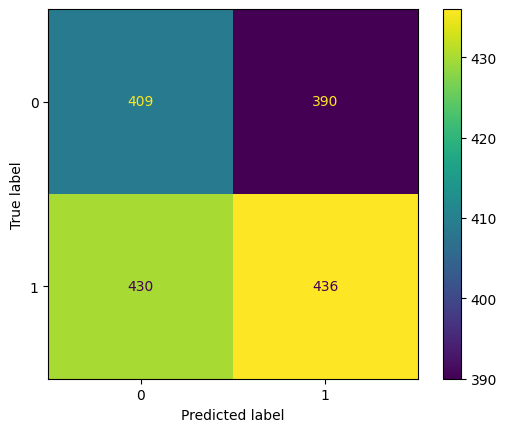

In [16]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdA= En_Offen_span_1dsne(**En_Hypm_vsb.best_params_)
En_Offen_span_MdA.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdA.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

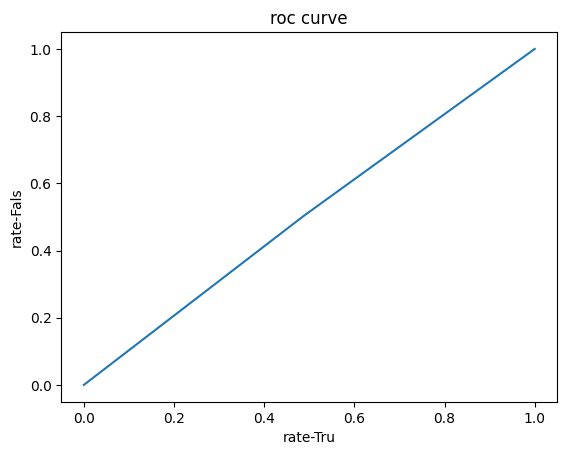

auc- curve: 0.5076770327805832


In [17]:
from sklearn.metrics import roc_curve as En_Offen_span_rc
from sklearn.metrics import roc_auc_score as En_Offen_span_ac
import matplotlib.pyplot as En_Offen_span_mt

En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50       812
           1       0.52      0.51      0.52       854

    accuracy                           0.51      1666
   macro avg       0.51      0.51      0.51      1666
weighted avg       0.51      0.51      0.51      1666


 testing duration: 0.10657048225402832 



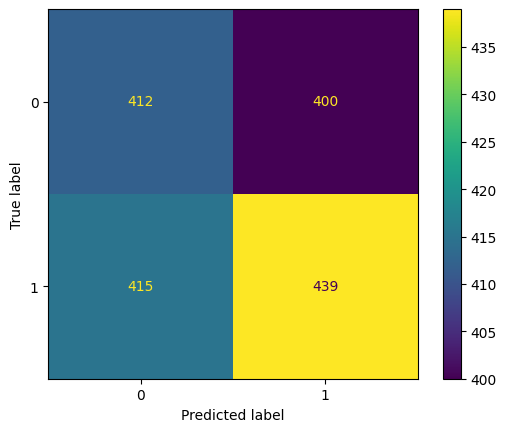

In [18]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdA.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

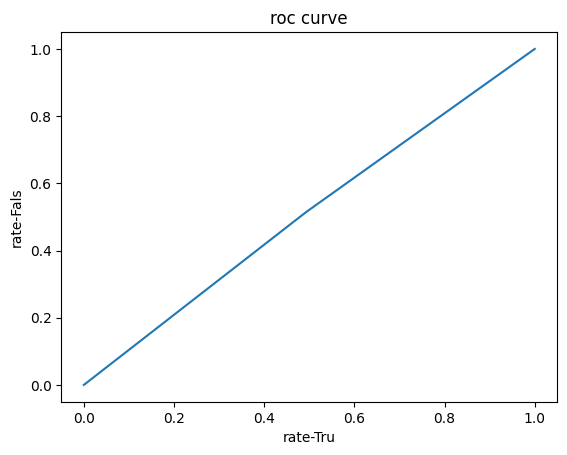

auc- curve: 0.5107203424049099


In [19]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

# SVM

In [20]:
from sklearn.svm import SVC as En_Offen_span_1spv

En_Hypm = { 'kernel': ['sigmoid','poly','rbg','linear'],
               'gamma': ['auto','scale'],
               'degree':[2,3,4,5,6,7]}


En_Hypm_vsb = En_Offen_span_1spv(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2; 1/48] START degree=2, gamma=auto, kernel=sigmoid.......................
[CV 1/2; 1/48] END degree=2, gamma=auto, kernel=sigmoid;, score=0.520 total time=   0.0s
[CV 2/2; 1/48] START degree=2, gamma=auto, kernel=sigmoid.......................
[CV 2/2; 1/48] END degree=2, gamma=auto, kernel=sigmoid;, score=0.516 total time=   0.0s
[CV 1/2; 2/48] START degree=2, gamma=auto, kernel=poly..........................
[CV 1/2; 2/48] END degree=2, gamma=auto, kernel=poly;, score=0.520 total time=   0.0s
[CV 2/2; 2/48] START degree=2, gamma=auto, kernel=poly..........................
[CV 2/2; 2/48] END degree=2, gamma=auto, kernel=poly;, score=0.516 total time=   0.0s
[CV 1/2; 3/48] START degree=2, gamma=auto, kernel=rbg...........................
[CV 1/2; 3/48] END degree=2, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 2/2; 3/48] START degree=2, gamma=auto, kernel=rbg...........................
[CV 2/2; 3/48] END d

[CV 1/2; 26/48] END degree=5, gamma=auto, kernel=poly;, score=0.520 total time=   0.0s
[CV 2/2; 26/48] START degree=5, gamma=auto, kernel=poly.........................
[CV 2/2; 26/48] END degree=5, gamma=auto, kernel=poly;, score=0.516 total time=   0.0s
[CV 1/2; 27/48] START degree=5, gamma=auto, kernel=rbg..........................
[CV 1/2; 27/48] END degree=5, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 2/2; 27/48] START degree=5, gamma=auto, kernel=rbg..........................
[CV 2/2; 27/48] END degree=5, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 1/2; 28/48] START degree=5, gamma=auto, kernel=linear.......................
[CV 1/2; 28/48] END degree=5, gamma=auto, kernel=linear;, score=0.484 total time=   0.0s
[CV 2/2; 28/48] START degree=5, gamma=auto, kernel=linear.......................
[CV 2/2; 28/48] END degree=5, gamma=auto, kernel=linear;, score=0.492 total time=   0.0s
[CV 1/2; 29/48] START degree=5, gamma=scale, kernel=sigmoid................


 training duration: 0.4149610996246338 

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       799
           1       0.00      0.00      0.00       866

    accuracy                           0.48      1665
   macro avg       0.24      0.50      0.32      1665
weighted avg       0.23      0.48      0.31      1665


 validation duration: 0.6999516487121582 



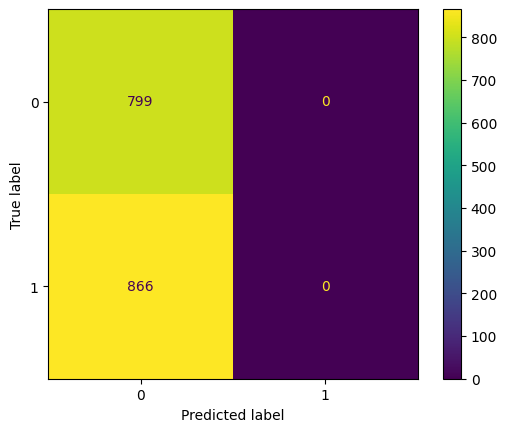

In [21]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdB= En_Offen_span_1spv(**En_Hypm_vsb.best_params_)
En_Offen_span_MdB.fit(En_Offen_span_1xr[:1000], En_Offen_span_1yr[:1000])

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdB.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

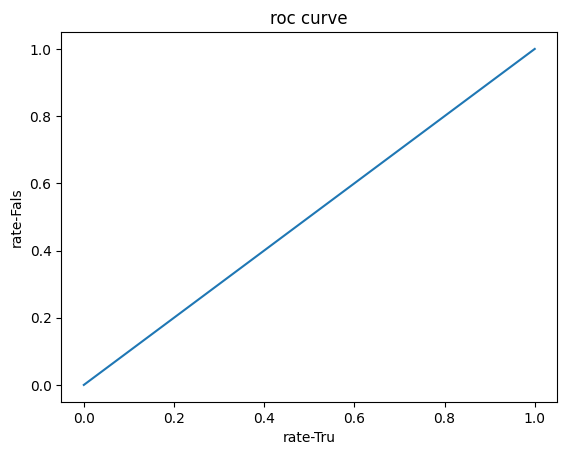

auc- curve: 0.5


In [22]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       812
           1       0.00      0.00      0.00       854

    accuracy                           0.49      1666
   macro avg       0.24      0.50      0.33      1666
weighted avg       0.24      0.49      0.32      1666


 testing duration: 0.7083680629730225 



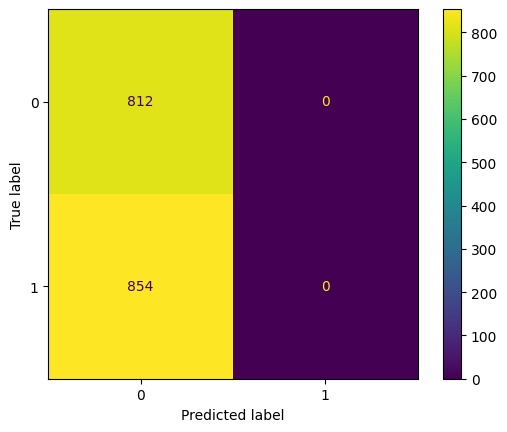

In [23]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdB.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

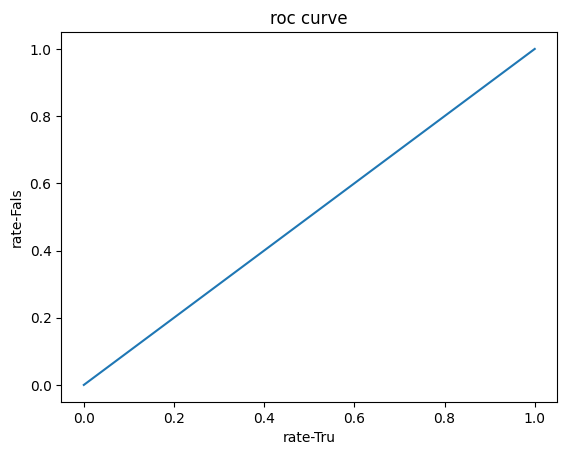

auc- curve: 0.5


In [24]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB as En_Offen_span_1nvb

En_Hypm = { 'var_smoothing': [1e-9,1e-10,1e-11,1e-12,1e-13]}


En_Hypm_vsb = En_Offen_span_1nvb()
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2; 1/5] START var_smoothing=1e-09.........................................
[CV 1/2; 1/5] END ..........var_smoothing=1e-09;, score=0.528 total time=   0.0s
[CV 2/2; 1/5] START var_smoothing=1e-09.........................................
[CV 2/2; 1/5] END ..........var_smoothing=1e-09;, score=0.524 total time=   0.0s
[CV 1/2; 2/5] START var_smoothing=1e-10.........................................
[CV 1/2; 2/5] END ..........var_smoothing=1e-10;, score=0.528 total time=   0.0s
[CV 2/2; 2/5] START var_smoothing=1e-10.........................................
[CV 2/2; 2/5] END ..........var_smoothing=1e-10;, score=0.524 total time=   0.0s
[CV 1/2; 3/5] START var_smoothing=1e-11.........................................
[CV 1/2; 3/5] END ..........var_smoothing=1e-11;, score=0.528 total time=   0.0s
[CV 2/2; 3/5] START var_smoothing=1e-11.........................................
[CV 2/2; 3/5] END ..........var_smoothing=1e-11;,


 training duration: 0.08369779586791992 

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       799
           1       0.80      0.01      0.02       866

    accuracy                           0.48      1665
   macro avg       0.64      0.50      0.33      1665
weighted avg       0.65      0.48      0.32      1665


 validation duration: 0.12896013259887695 



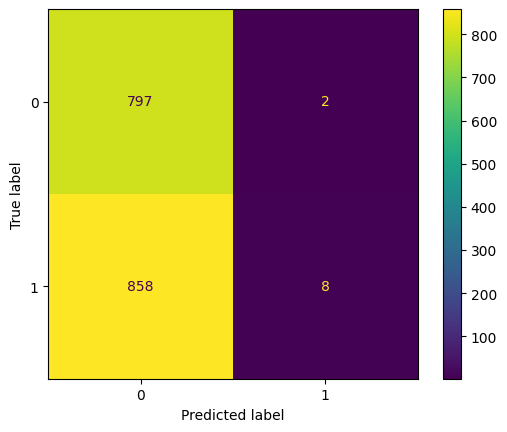

In [26]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdC= En_Offen_span_1nvb(**En_Hypm_vsb.best_params_)
En_Offen_span_MdC.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdC.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

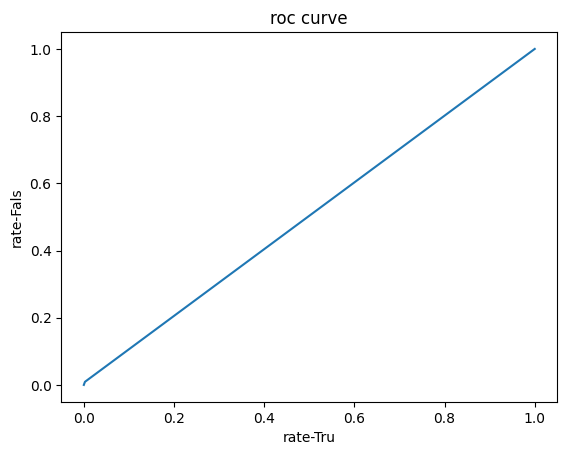

auc- curve: 0.5033673731887724


In [27]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

           0       0.49      1.00      0.65       812
           1       0.33      0.00      0.00       854

    accuracy                           0.49      1666
   macro avg       0.41      0.50      0.33      1666
weighted avg       0.41      0.49      0.32      1666


 testing duration: 0.13211297988891602 



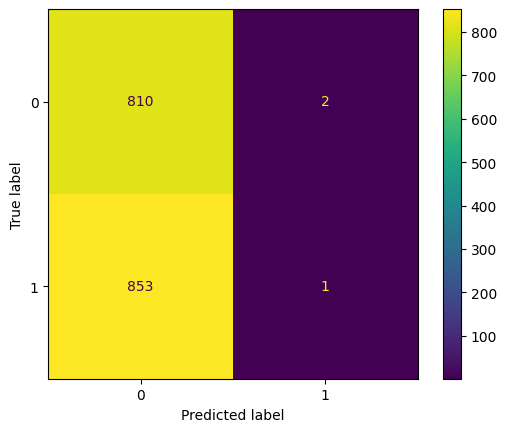

In [28]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdC.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

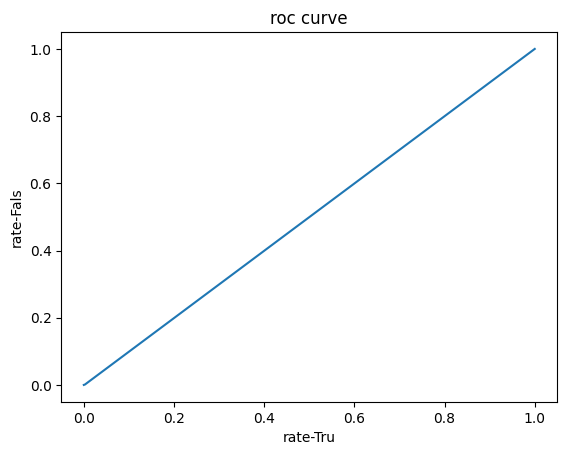

auc- curve: 0.4993539530000807


In [29]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

# AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier as En_Offen_span_1ads

En_Hypm = { 'algorithm': ['SAMME.R','SAMME'],
               'learning_rate': [1.0,2.0,3.0,4.0,5.0],
               'n_estimators':[40,50,60,70,80]}


En_Hypm_vsb = En_Offen_span_1ads(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 1/2; 1/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=40......
[CV 1/2; 1/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.500 total time=   1.4s
[CV 2/2; 1/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=40......
[CV 2/2; 1/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.556 total time=   1.3s
[CV 1/2; 2/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=50......
[CV 1/2; 2/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50;, score=0.508 total time=   1.8s
[CV 2/2; 2/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=50......
[CV 2/2; 2/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50;, score=0.532 total time=   1.9s
[CV 1/2; 3/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=60......
[CV 1/2; 3/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=60;, score=0.524 total time=   2.2s
[CV

[CV 2/2; 22/50] END algorithm=SAMME.R, learning_rate=5.0, n_estimators=50;, score=0.544 total time=   1.7s
[CV 1/2; 23/50] START algorithm=SAMME.R, learning_rate=5.0, n_estimators=60.....
[CV 1/2; 23/50] END algorithm=SAMME.R, learning_rate=5.0, n_estimators=60;, score=0.484 total time=   1.9s
[CV 2/2; 23/50] START algorithm=SAMME.R, learning_rate=5.0, n_estimators=60.....
[CV 2/2; 23/50] END algorithm=SAMME.R, learning_rate=5.0, n_estimators=60;, score=0.544 total time=   2.0s
[CV 1/2; 24/50] START algorithm=SAMME.R, learning_rate=5.0, n_estimators=70.....
[CV 1/2; 24/50] END algorithm=SAMME.R, learning_rate=5.0, n_estimators=70;, score=0.484 total time=   2.4s
[CV 2/2; 24/50] START algorithm=SAMME.R, learning_rate=5.0, n_estimators=70.....
[CV 2/2; 24/50] END algorithm=SAMME.R, learning_rate=5.0, n_estimators=70;, score=0.544 total time=   2.4s
[CV 1/2; 25/50] START algorithm=SAMME.R, learning_rate=5.0, n_estimators=80.....
[CV 1/2; 25/50] END algorithm=SAMME.R, learning_rate=5.0, n_

[CV 2/2; 44/50] END algorithm=SAMME, learning_rate=4.0, n_estimators=70;, score=0.516 total time=   2.3s
[CV 1/2; 45/50] START algorithm=SAMME, learning_rate=4.0, n_estimators=80.......
[CV 1/2; 45/50] END algorithm=SAMME, learning_rate=4.0, n_estimators=80;, score=0.476 total time=   2.7s
[CV 2/2; 45/50] START algorithm=SAMME, learning_rate=4.0, n_estimators=80.......
[CV 2/2; 45/50] END algorithm=SAMME, learning_rate=4.0, n_estimators=80;, score=0.516 total time=   2.6s
[CV 1/2; 46/50] START algorithm=SAMME, learning_rate=5.0, n_estimators=40.......
[CV 1/2; 46/50] END algorithm=SAMME, learning_rate=5.0, n_estimators=40;, score=0.512 total time=   1.4s
[CV 2/2; 46/50] START algorithm=SAMME, learning_rate=5.0, n_estimators=40.......
[CV 2/2; 46/50] END algorithm=SAMME, learning_rate=5.0, n_estimators=40;, score=0.516 total time=   1.3s
[CV 1/2; 47/50] START algorithm=SAMME, learning_rate=5.0, n_estimators=50.......
[CV 1/2; 47/50] END algorithm=SAMME, learning_rate=5.0, n_estimators=5


 training duration: 31.966985940933228 

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       799
           1       1.00      0.00      0.00       866

    accuracy                           0.48      1665
   macro avg       0.74      0.50      0.33      1665
weighted avg       0.75      0.48      0.31      1665


 validation duration: 0.3120005130767822 



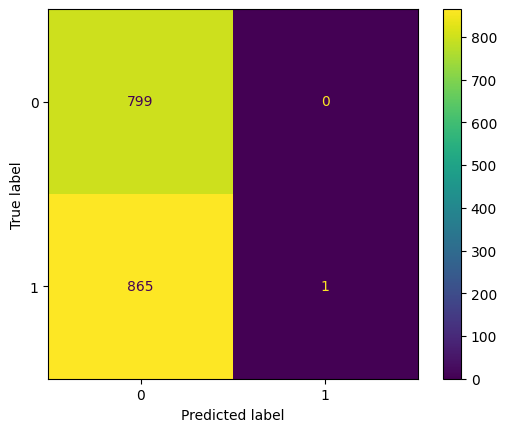

In [31]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdD= En_Offen_span_1ads(**En_Hypm_vsb.best_params_)
En_Offen_span_MdD.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdD.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

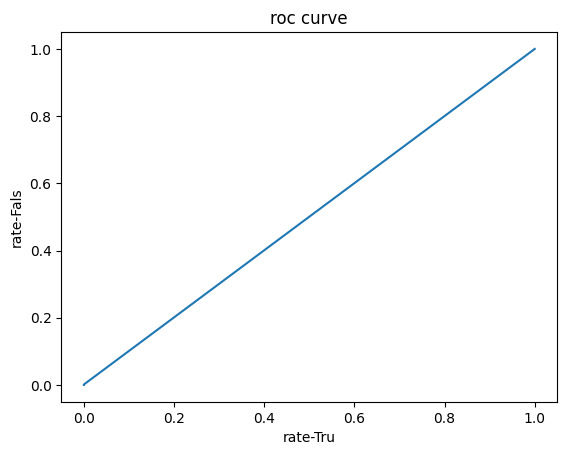

auc- curve: 0.5005773672055427


In [32]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       812
           1       0.00      0.00      0.00       854

    accuracy                           0.49      1666
   macro avg       0.24      0.50      0.33      1666
weighted avg       0.24      0.49      0.32      1666


 testing duration: 0.28887319564819336 



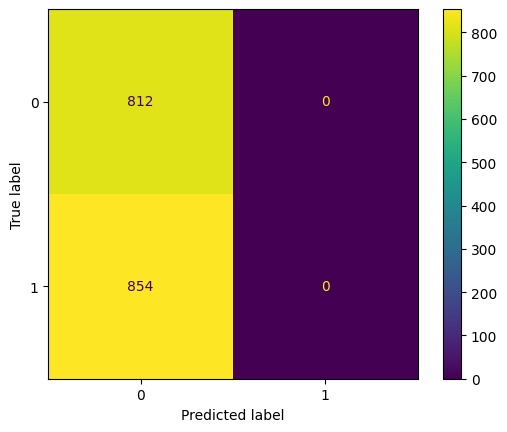

In [33]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdD.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

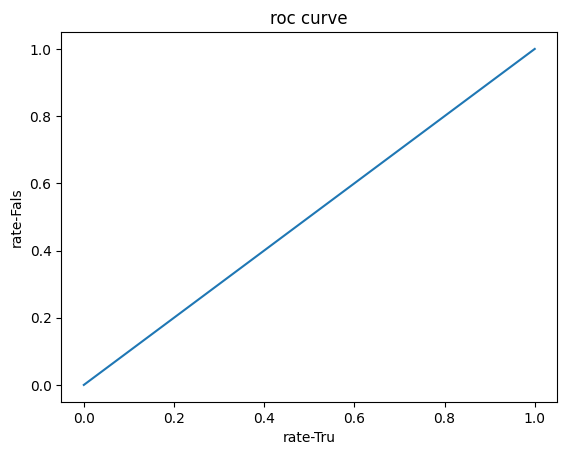

auc- curve: 0.5


In [34]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

# XgBoost

In [35]:
from xgboost import XGBClassifier as En_Offen_span_1etg

En_Hypm = { 'n_estimators': [20,40,60,80],
               'subsample': [0.01,0.04,0.06,0.09],
               'learning_rate':[0.1,0.3,0.5,0.7]}


En_Hypm_vsb = En_Offen_span_1etg(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV 1/2; 1/64] START learning_rate=0.1, n_estimators=20, subsample=0.01.........
[CV 1/2; 1/64] END learning_rate=0.1, n_estimators=20, subsample=0.01;, score=0.520 total time=   0.0s
[CV 2/2; 1/64] START learning_rate=0.1, n_estimators=20, subsample=0.01.........
[CV 2/2; 1/64] END learning_rate=0.1, n_estimators=20, subsample=0.01;, score=0.516 total time=   0.0s
[CV 1/2; 2/64] START learning_rate=0.1, n_estimators=20, subsample=0.04.........
[CV 1/2; 2/64] END learning_rate=0.1, n_estimators=20, subsample=0.04;, score=0.456 total time=   0.0s
[CV 2/2; 2/64] START learning_rate=0.1, n_estimators=20, subsample=0.04.........
[CV 2/2; 2/64] END learning_rate=0.1, n_estimators=20, subsample=0.04;, score=0.468 total time=   0.0s
[CV 1/2; 3/64] START learning_rate=0.1, n_estimators=20, subsample=0.06.........
[CV 1/2; 3/64] END learning_rate=0.1, n_estimators=20, subsample=0.06;, score=0.528 total time=   0.0s
[CV 2/2; 3/64] STA

[CV 1/2; 24/64] END learning_rate=0.3, n_estimators=40, subsample=0.09;, score=0.540 total time=   0.0s
[CV 2/2; 24/64] START learning_rate=0.3, n_estimators=40, subsample=0.09........
[CV 2/2; 24/64] END learning_rate=0.3, n_estimators=40, subsample=0.09;, score=0.520 total time=   0.0s
[CV 1/2; 25/64] START learning_rate=0.3, n_estimators=60, subsample=0.01........
[CV 1/2; 25/64] END learning_rate=0.3, n_estimators=60, subsample=0.01;, score=0.520 total time=   0.0s
[CV 2/2; 25/64] START learning_rate=0.3, n_estimators=60, subsample=0.01........
[CV 2/2; 25/64] END learning_rate=0.3, n_estimators=60, subsample=0.01;, score=0.516 total time=   0.0s
[CV 1/2; 26/64] START learning_rate=0.3, n_estimators=60, subsample=0.04........
[CV 1/2; 26/64] END learning_rate=0.3, n_estimators=60, subsample=0.04;, score=0.476 total time=   0.0s
[CV 2/2; 26/64] START learning_rate=0.3, n_estimators=60, subsample=0.04........
[CV 2/2; 26/64] END learning_rate=0.3, n_estimators=60, subsample=0.04;, sc

[CV 2/2; 47/64] END learning_rate=0.5, n_estimators=80, subsample=0.06;, score=0.564 total time=   0.0s
[CV 1/2; 48/64] START learning_rate=0.5, n_estimators=80, subsample=0.09........
[CV 1/2; 48/64] END learning_rate=0.5, n_estimators=80, subsample=0.09;, score=0.532 total time=   0.0s
[CV 2/2; 48/64] START learning_rate=0.5, n_estimators=80, subsample=0.09........
[CV 2/2; 48/64] END learning_rate=0.5, n_estimators=80, subsample=0.09;, score=0.488 total time=   0.0s
[CV 1/2; 49/64] START learning_rate=0.7, n_estimators=20, subsample=0.01........
[CV 1/2; 49/64] END learning_rate=0.7, n_estimators=20, subsample=0.01;, score=0.520 total time=   0.0s
[CV 2/2; 49/64] START learning_rate=0.7, n_estimators=20, subsample=0.01........
[CV 2/2; 49/64] END learning_rate=0.7, n_estimators=20, subsample=0.01;, score=0.516 total time=   0.0s
[CV 1/2; 50/64] START learning_rate=0.7, n_estimators=20, subsample=0.04........
[CV 1/2; 50/64] END learning_rate=0.7, n_estimators=20, subsample=0.04;, sc


 training duration: 2.475534200668335 

              precision    recall  f1-score   support

           0       0.48      0.55      0.51       799
           1       0.52      0.46      0.49       866

    accuracy                           0.50      1665
   macro avg       0.50      0.50      0.50      1665
weighted avg       0.50      0.50      0.50      1665


 validation duration: 0.10024333000183105 



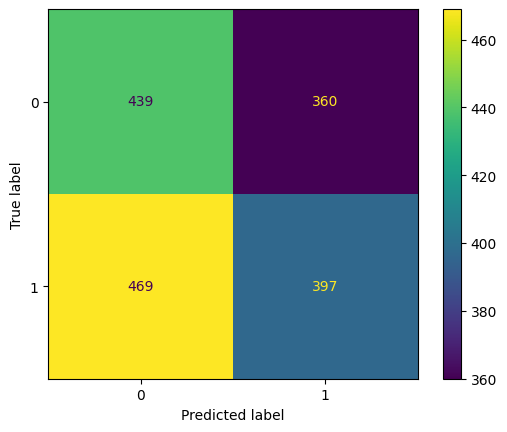

In [36]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdE= En_Offen_span_1etg(**En_Hypm_vsb.best_params_)
En_Offen_span_MdE.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdE.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

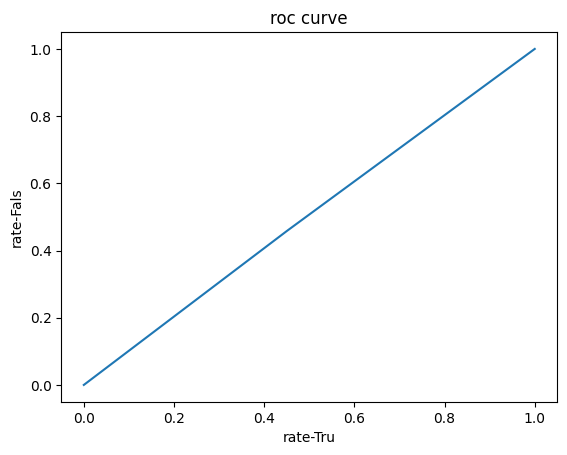

auc- curve: 0.5039331785979587


In [37]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

           0       0.49      0.52      0.50       812
           1       0.51      0.48      0.50       854

    accuracy                           0.50      1666
   macro avg       0.50      0.50      0.50      1666
weighted avg       0.50      0.50      0.50      1666


 testing duration: 0.11501765251159668 



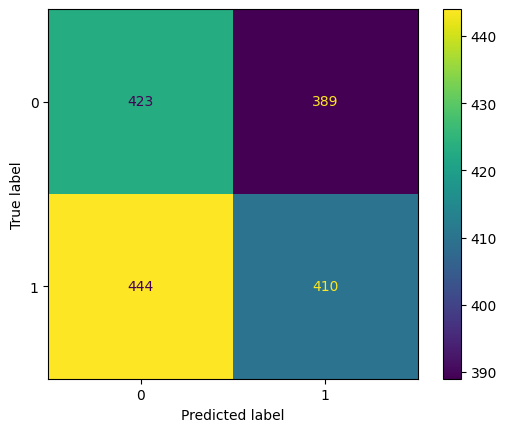

In [38]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdE.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

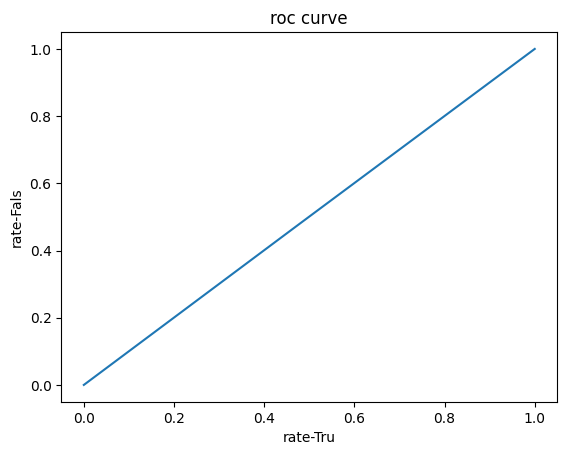

auc- curve: 0.5005148187030606


In [39]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))